# M4 T01: Algoritmes d'aprenentatge supervisat: Regressions

Exercicis per practicar amb regressions

## Nivell 1 - Exercici 1

Crea almenys tres models de regressió diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv.

_Llegim les dades que estan en format CSV, **DelayedFlights.csv**, per això necessitem carregar la llibreria **pandas**. Aprofitarem per a carregar altres llibreries que necessitarem més endevant:_

In [132]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm 

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

df = pd.read_csv('./../data/DelayedFlights.csv', index_col=0)

C:\Users\Nuria\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [133]:
df.shape

(1936758, 29)

In [134]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

_Com que el que volem és predir els endarreriments dels vols (ArrDelay), crec que hem d'excloure del nostre conjunt de dades aquells vols que han estat cancel·lats i derivats, perquè en aquests casos els endarreriments no consten_

In [135]:
df2 = df.loc[df.loc[:,'Cancelled'] == 0]
df2 = df2.loc[df2.loc[:,'Diverted'] == 0]
df2.shape

(1928371, 29)

_Aprofitem per eliminar del nostre conjunt de dades, variables que no anem a utilitzar i creem noves variables que ens poden ser d'interès_

In [136]:
df3 = df2.drop(['Year','DepTime','CRSDepTime','ArrTime','CRSArrTime','FlightNum','TailNum','Cancelled','CancellationCode','Diverted'], axis = 1)
df3.shape

(1928371, 19)

_Terme quadràtic de la variable TaxiOut_

In [138]:
df3['TaxiOut2'] = df3['TaxiOut']**2 

_La companyia WN era quina presentava més endarreriments, creem variable dummy que ens indiqui si la companyia és WN o no (vist en exercicis anteriors)_

In [139]:
df3['CarrierWN'] = (df3['UniqueCarrier'] == 'WN').astype(int)

_Creem dummy que ens indiqui el dia de la setmana_

In [141]:
dummy = pd.get_dummies(df3['DayOfWeek'])
df4 = pd.concat([df3, dummy], axis = 1)
df4.head()

,Month,DayofMonth,DayOfWeek,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,...,LateAircraftDelay,TaxiOut2,CarrierWN,1,2,3,4,5,6,7
0,1,3,4,WN,128.0,150.0,116.0,-14.0,8.0,IAD,...,NaN,64.0,1,0,0,0,1,0,0,0
1,1,3,4,WN,128.0,145.0,113.0,2.0,19.0,IAD,...,NaN,100.0,1,0,0,0,1,0,0,0
2,1,3,4,WN,96.0,90.0,76.0,14.0,8.0,IND,...,NaN,289.0,1,0,0,0,1,0,0,0
4,1,3,4,WN,90.0,90.0,77.0,34.0,34.0,IND,...,32.0,100.0,1,0,0,0,1,0,0,0
5,1,3,4,WN,101.0,115.0,87.0,11.0,25.0,IND,...,NaN,100.0,1,0,0,0,1,0,0,0


In [142]:
df_ok = df4.rename(columns={1:'Day_Mon',2:'Day_Tu',3:'Day_Wed',4:'Day_Thu',5:'Day_Fri',6:'Day_Sat',7:'Day_Sun'})
df_ok.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay', 'TaxiOut2', 'CarrierWN', 'Day_Mon', 'Day_Tu',
       'Day_Wed', 'Day_Thu', 'Day_Fri', 'Day_Sat', 'Day_Sun'],
      dtype='object')

_La variable **ArrDelay** que serà la nostra variable resposta (y), la resta seran variables explicatives o independents(X). Creem els conjunts de dades corresponents._

In [143]:
X, y = df_ok.loc[:, df_ok.columns != 'ArrDelay'], df_ok.loc[:,'ArrDelay']
print(X.shape, y.shape)

(1928371, 27) (1928371,)


In [144]:
X.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'DepDelay', 'Origin',
       'Dest', 'Distance', 'TaxiIn', 'TaxiOut', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'TaxiOut2',
       'CarrierWN', 'Day_Mon', 'Day_Tu', 'Day_Wed', 'Day_Thu', 'Day_Fri',
       'Day_Sat', 'Day_Sun'],
      dtype='object')

- _Model 1_

_Ja haviem vist, una relació lineal entre les variables **ArrDelay** i **DepDelay**. El primer model serà aquest amb una única variable explicativa_

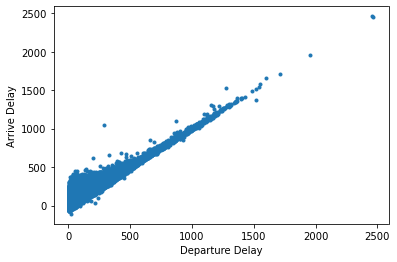

In [145]:
plt.scatter(X['DepDelay'],y,marker='.')
plt.ylabel("Arrive Delay")
plt.xlabel("Departure Delay")
plt.show()

_Creem el subconjunt de dades X amb només aquesta variable explicativa_

In [146]:
X1 = X['DepDelay']

In [147]:
X1.shape

(1928371,)

_Ajustem el model (amb constant):_

In [148]:
X1 = sm.add_constant(X1)
model1 = sm.OLS(y, X1).fit()

model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ArrDelay   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                 1.905e+07
Date:                Tue, 26 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:53:29   Log-Likelihood:            -8.2242e+06
No. Observations:             1928371   AIC:                         1.645e+07
Df Residuals:                 1928369   BIC:                         1.645e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5759      0.016    -98.820      0.000      -1.607      -1.545
DepDelay       1.0159      0.000   4364.397      0.000       1.015       1.016
==============================================================================
Omnibus:                  1277609.269   Durbin-Watson:                   1.697
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         39393320.164
Skew:                           2.748   Prob(JB):                         0.00
Kurtosis:                      24.449   Cond. No.                         88.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

_El model ajusta prou bé, 0.9 de coeficient de determinació_

- _Model 2_

_Explorem altres variables X que estarien correlacionades amb la variable ArrDelay_

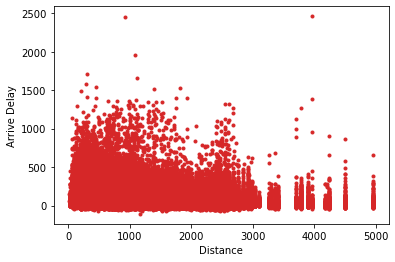

In [149]:
plt.scatter(X['Distance'],y,marker='.',color = 'C3')
plt.ylabel("Arrive Delay")
plt.xlabel("Distance")
plt.show()

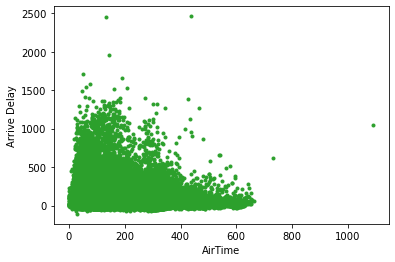

In [150]:
plt.scatter(X['AirTime'],y,marker='.',color = 'C2')
plt.ylabel("Arrive Delay")
plt.xlabel("AirTime")
plt.show()

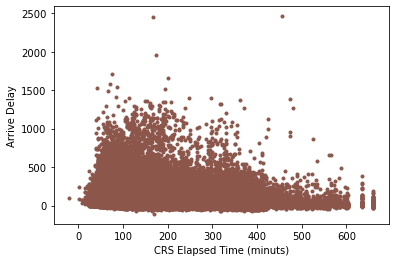

In [151]:
plt.scatter(X['CRSElapsedTime'],y,marker='.',color = 'C5')
plt.ylabel("Arrive Delay")
plt.xlabel("CRS Elapsed Time (minuts)")
plt.show()

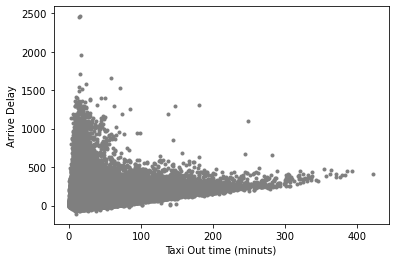

In [152]:
plt.scatter(X['TaxiOut'],y,marker='.',color = 'C7')
plt.ylabel("Arrive Delay")
plt.xlabel("Taxi Out time (minuts)")
plt.show()

_Afegirem al model anterior una nova variable, la TaxiOut (encara que potser caldria transformar-la):_

_Creem el subconjunt de dades X amb les dues variables explicatives_

In [153]:
X2 = X[['DepDelay', 'TaxiOut']]

In [154]:
X2 = sm.add_constant(X2)
model2 = sm.OLS(y, X2).fit()

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ArrDelay   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                 1.957e+07
Date:                Tue, 26 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:54:45   Log-Likelihood:            -7.5764e+06
No. Observations:             1928371   AIC:                         1.515e+07
Df Residuals:                 1928368   BIC:                         1.515e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -16.1870      0.016  -1033.191      0.000     -16.218     -16.156
DepDelay       0.9980      0.000   5980.967      0.000       0.998       0.998
TaxiOut        0.8443      0.001   1359.167      0.000       0.843       0.846
==============================================================================
Omnibus:                   604014.459   Durbin-Watson:                   1.486
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         20930363.011
Skew:                           0.854   Prob(JB):                         0.00
Kurtosis:                      19.049   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

_Afegint aquestes dues variables, les dues significaties al model, el coeficient de determinació ha augmentat fins el 0.95_

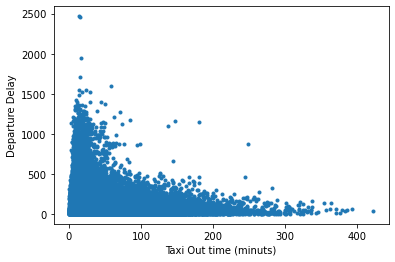

In [155]:
plt.scatter(X['TaxiOut'],X['DepDelay'],marker='.')
plt.ylabel("Departure Delay")
plt.xlabel("Taxi Out time (minuts)")
plt.show()

- _Model 3_

_Per a aquest nou model, afegirem el dia de la setmana. Per això, previament hem creat les variables dummies corresponents, no les afegirem totes 7, sino 6 per evitar problemes de colinealitat_

In [156]:
X3 = X[['DepDelay','TaxiOut','Day_Mon', 'Day_Tu', 'Day_Wed', 'Day_Thu','Day_Fri','Day_Sat']]
X3.head()

,DepDelay,TaxiOut,Day_Mon,Day_Tu,Day_Wed,Day_Thu,Day_Fri,Day_Sat
0,8.0,8.0,0,0,0,1,0,0
1,19.0,10.0,0,0,0,1,0,0
2,8.0,17.0,0,0,0,1,0,0
4,34.0,10.0,0,0,0,1,0,0
5,25.0,10.0,0,0,0,1,0,0


In [157]:
X3 = sm.add_constant(X3)
model3 = sm.OLS(y, X3).fit()

model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ArrDelay   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                 4.895e+06
Date:                Tue, 26 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:59:16   Log-Likelihood:            -7.5759e+06
No. Observations:             1928371   AIC:                         1.515e+07
Df Residuals:                 1928362   BIC:                         1.515e+07
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -16.1810      0.026   -611.032      0.000     -16.233     -16.129
DepDelay       0.9980      0.000   5979.593      0.000       0.998       0.998
TaxiOut        0.8439      0.001   1358.319      0.000       0.843       0.845
Day_Mon       -0.2753      0.032     -8.482      0.000      -0.339      -0.212
Day_Tu         0.2735      0.033      8.194      0.000       0.208       0.339
Day_Wed       -0.1528      0.033     -4.585      0.000      -0.218      -0.087
Day_Thu        0.1914      0.033      5.889      0.000       0.128       0.255
Day_Fri        0.3055      0.032      9.654      0.000       0.243       0.367
Day_Sat       -0.4437      0.035    -12.742      0.000      -0.512      -0.375
==============================================================================
Omnibus:                   603956.128   Durbin-Watson:                   1.486
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         20926218.389
Skew:                           0.854   Prob(JB):                         0.00
Kurtosis:                      19.048   Cond. No.                         512.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

_En aquest tercer model, les varles dues significaties al model, el coeficient de determinació ha augmentat fins el 0.95_

## Nivell 1 - Exercici 2

Compara’ls en base al MSE i al R2.

- _Model 1_

In [158]:
X1 = X[['DepDelay']]
#X1.shape

In [159]:
lm = linear_model.LinearRegression()
model1_sk = lm.fit(X1,y)

In [160]:
lm.score(X1,y)

0.9080692673713633

In [161]:
pred1_sk = model1_sk.predict(X1)
mean_squared_error(y, pred1_sk)

296.4308497086777

- _Model 2_

In [162]:
X2 = X[['DepDelay', 'TaxiOut']]
lm = linear_model.LinearRegression()
model2_sk = lm.fit(X2,y)

In [163]:
lm.score(X2,y)

0.9530481447681334

In [164]:
pred2_sk = model2_sk.predict(X2)
mean_squared_error(y, pred2_sk)

151.3963605403224

- _Model 3_

In [165]:
X3 = X[['DepDelay','TaxiOut','Day_Mon', 'Day_Tu', 'Day_Wed', 'Day_Thu','Day_Fri','Day_Sat']]
lm = linear_model.LinearRegression()
model3_sk = lm.fit(X3,y)

In [166]:
lm.score(X3,y)

0.9530693324939608

In [167]:
pred3_sk = model3_sk.predict(X3)
mean_squared_error(y, pred3_sk)

151.32804067175567

_El model amb un coeficient de determinació més alt i un RME més petit, correspon al tercer model. Ara bé, els paràmetres són molts semblants al model 2, pel criteri de parsimònia potser escolliria el model 2 que és  més senzill_

## Nivell 1 - Exercici 3

Entrena’ls utilitzant els diferents paràmetres que admeten.

_Dividim els conjunts de dades en Train i Test, farem que Train tingui el 67% de les observacions i Test el 33% restant, amb la instrucció shape ho revisarem_

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1292008, 27) (636363, 27) (1292008,) (636363,)


_Entrenem els models:_

- _Model 1_

In [169]:
X_train1 = X_train[['DepDelay']]

In [170]:
lm1 = linear_model.LinearRegression()
model_train1_sk = lm1.fit(X_train1,y_train)
lm1.score(X_train1,y_train)

0.9076838084545442

- _Model 2_

In [171]:
X_train2 = X_train[['DepDelay', 'TaxiOut']]

In [172]:
lm2 = linear_model.LinearRegression()
model_train2_sk = lm2.fit(X_train2,y_train)
lm2.score(X_train2,y_train)

0.9529424829200783

- _Model 3_

In [173]:
X_train3 = X_train[['DepDelay','TaxiOut','Day_Mon', 'Day_Tu', 'Day_Wed', 'Day_Thu','Day_Fri','Day_Sat']]

In [174]:
lm3 = linear_model.LinearRegression()
model_train3_sk = lm3.fit(X_train3,y_train)
lm3.score(X_train3,y_train)

0.9529632988708584

## Nivell 1 - Exercici 4

Compara el seu rendiment utilitzant l’aproximació traint/test o utilitzant totes les dades (validació interna)

- _Model 1_

In [175]:
X_test1 = X_test[['DepDelay']]

In [176]:
y_pred1_sk = model_train1_sk.predict(X_test1)

In [177]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1_sk)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1_sk)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1_sk)))

Mean Absolute Error: 11.265192243588142
Mean Squared Error: 296.15731187888616
Root Mean Squared Error: 17.209221710434385


- _Model 2_

In [178]:
X_test2 = X_test[['DepDelay', 'TaxiOut']]

In [179]:
y_pred2_sk = model_train2_sk.predict(X_test2)

In [180]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred2_sk)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred2_sk)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2_sk)))

Mean Absolute Error: 8.72758343361869
Mean Squared Error: 151.85175615200876
Root Mean Squared Error: 12.322814457420382


- _Model 3_

In [181]:
X_test3 = X_test[['DepDelay','TaxiOut','Day_Mon', 'Day_Tu', 'Day_Wed', 'Day_Thu','Day_Fri','Day_Sat']]

In [182]:
y_pred3_sk = model_train3_sk.predict(X_test3)

In [183]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred3_sk)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred3_sk)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3_sk)))

Mean Absolute Error: 8.72450368586708
Mean Squared Error: 151.7809531812536
Root Mean Squared Error: 12.319941281566791


## Nivell 2 - Exercici 5

Realitza algun procés d’enginyeria de variables per millorar-ne la predicció

_Partim del model 2 vist anteriorment i afegim el terme quadràtic de la variable TaxiOut_

In [192]:
X_train5 = X_train[['DepDelay','TaxiOut','TaxiOut2']]

In [193]:
X_train5 = sm.add_constant(X_train5)
model5 = sm.OLS(y_train, X_train5).fit()

model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ArrDelay   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                 8.821e+06
Date:                Tue, 26 Oct 2021   Prob (F-statistic):               0.00
Time:                        23:13:01   Log-Likelihood:            -5.0682e+06
No. Observations:             1292008   AIC:                         1.014e+07
Df Residuals:                 1292004   BIC:                         1.014e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.4375      0.024   -601.380      0.000     -14.485     -14.390
DepDelay       0.9986      0.000   4916.635      0.000       0.998       0.999
TaxiOut        0.7079      0.001    515.187      0.000       0.705       0.711
TaxiOut2       0.0013   1.13e-05    118.920      0.000       0.001       0.001
==============================================================================
Omnibus:                   461172.924   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         23226937.722
Skew:                           0.959   Prob(JB):                         0.00
Kurtosis:                      23.683   Cond. No.                     4.07e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

_Apenas ha augmentat el coeficient de determinació_

In [194]:
X_train5b = X_train[['DepDelay','TaxiOut','TaxiOut2','Distance','CarrierWN']]

In [195]:
X_train5b = sm.add_constant(X_train5b)
model5b = sm.OLS(y_train, X_train5b).fit()

model5b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ArrDelay   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                 5.477e+06
Date:                Tue, 26 Oct 2021   Prob (F-statistic):               0.00
Time:                        23:13:50   Log-Likelihood:            -5.0471e+06
No. Observations:             1292008   AIC:                         1.009e+07
Df Residuals:                 1292002   BIC:                         1.009e+07
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.9482      0.030   -434.374      0.000     -13.007     -12.890
DepDelay       0.9988      0.000   4989.424      0.000       0.998       0.999
TaxiOut        0.7579      0.001    536.636      0.000       0.755       0.761
TaxiOut2       0.0011   1.13e-05     95.305      0.000       0.001       0.001
Distance      -0.0035   1.86e-05   -187.879      0.000      -0.004      -0.003
CarrierWN      2.0364      0.028     72.333      0.000       1.981       2.092
==============================================================================
Omnibus:                   530126.821   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         28057510.220
Skew:                           1.206   Prob(JB):                         0.00
Kurtosis:                      25.702   Cond. No.                     6.07e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

_Afegint aquestes variables hem arribat a un model on totes les variables són significatives i el coeficient de determinació és del 95.5%_

In [199]:
X_train5b = X_train[['DepDelay','TaxiOut','TaxiOut2','Distance','CarrierWN']]
X_test5b = X_test[['DepDelay','TaxiOut','TaxiOut2','Distance','CarrierWN']]

In [200]:
lm5b = linear_model.LinearRegression()
model_train5b_sk = lm5b.fit(X_train5b,y_train)

y_pred5b_sk = model_train5b_sk.predict(X_test5b)

In [201]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred5b_sk)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred5b_sk)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5b_sk)))

Mean Absolute Error: 8.44054192064467
Mean Squared Error: 145.1825551641196
Root Mean Squared Error: 12.049172385027928


## Nivell 3 - Exercici 6

No utilitzis la variable DepDelay a l’hora de fer prediccions

_Ja haviem vist la forta relació lineal entre les variables ArrDelay i DepDelay. Anem a veure la correlació entre les variables numèriques del nostre conjunt de dades_

In [205]:
dfNUM = df3.loc[:,['ArrDelay','ActualElapsedTime','CRSElapsedTime','AirTime','DepDelay','Distance','TaxiIn','TaxiOut']]

In [206]:
corrMatrix = dfNUM.corr()
print (corrMatrix)

                   ArrDelay  ActualElapsedTime  CRSElapsedTime   AirTime  \
ArrDelay           1.000000           0.068130       -0.015676 -0.000189   
ActualElapsedTime  0.068130           1.000000        0.971122  0.976660   
CRSElapsedTime    -0.015676           0.971122        1.000000  0.986086   
AirTime           -0.000189           0.976660        0.986086  1.000000   
DepDelay           0.952927           0.018492        0.006835 -0.002753   
Distance          -0.029853           0.952980        0.981967  0.980294   
TaxiIn             0.156277           0.166348        0.099693  0.083926   
TaxiOut            0.286484           0.289568        0.123454  0.090398   

                   DepDelay  Distance    TaxiIn   TaxiOut  
ArrDelay           0.952927 -0.029853  0.156277  0.286484  
ActualElapsedTime  0.018492  0.952980  0.166348  0.289568  
CRSElapsedTime     0.006835  0.981967  0.099693  0.123454  
AirTime           -0.002753  0.980294  0.083926  0.090398  
DepDelay       

_Amb diferència la variable DepDelay és la variable més correlacionada amb ArrDelay. De les altres variables, les que tenen més correlació amb ArrDelay és TaxiOut seguida per TaxiIn, encara que la correlació és bastant baixa. Afegim aquestes dos variables al model, juntament amb les altres dos variables que hem afegit al model anterior (Distance i CarrierWN)_

In [207]:
X_train6 = X_train[['TaxiIn','TaxiOut','Distance','CarrierWN']]

In [208]:
X_train6 = sm.add_constant(X_train6)
model6 = sm.OLS(y_train, X_train6).fit()

model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ArrDelay   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                 3.808e+04
Date:                Tue, 26 Oct 2021   Prob (F-statistic):               0.00
Time:                        23:37:10   Log-Likelihood:            -6.9776e+06
No. Observations:             1292008   AIC:                         1.396e+07
Df Residuals:                 1292003   BIC:                         1.396e+07
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.1409      0.122    140.052      0.000      16.901      17.381
TaxiIn         1.4983      0.009    164.078      0.000       1.480       1.516
TaxiOut        1.0992      0.003    323.606      0.000       1.093       1.106
Distance      -0.0061   8.28e-05    -73.366      0.000      -0.006      -0.006
CarrierWN     -2.8216      0.125    -22.623      0.000      -3.066      -2.577
==============================================================================
Omnibus:                  1196395.215   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        101787873.135
Skew:                           4.214   Prob(JB):                         0.00
Kurtosis:                      45.659   Cond. No.                     3.00e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

_El coeficient de determinació és bastant baix, només del 10%. Afegint més variables al model, de les que disposem actualment en el nostre conjunt de dades, no aconseguim augmentar substancialment el coeficient de determinació. Potser necessitariem crear altres variables, a partir de les que disposem actualment_

In [209]:
X_train6 = X_train[['TaxiIn','TaxiOut','Distance','CarrierWN']]
X_test6 = X_test[['TaxiIn','TaxiOut','Distance','CarrierWN']]

In [210]:
lm6 = linear_model.LinearRegression()
model_train6_sk = lm6.fit(X_train6,y_train)

y_pred6_sk = model_train6_sk.predict(X_test6)

In [211]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred6_sk)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred6_sk)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred6_sk)))

Mean Absolute Error: 34.491174625026794
Mean Squared Error: 2912.3782973059983
Root Mean Squared Error: 53.96645529684156
